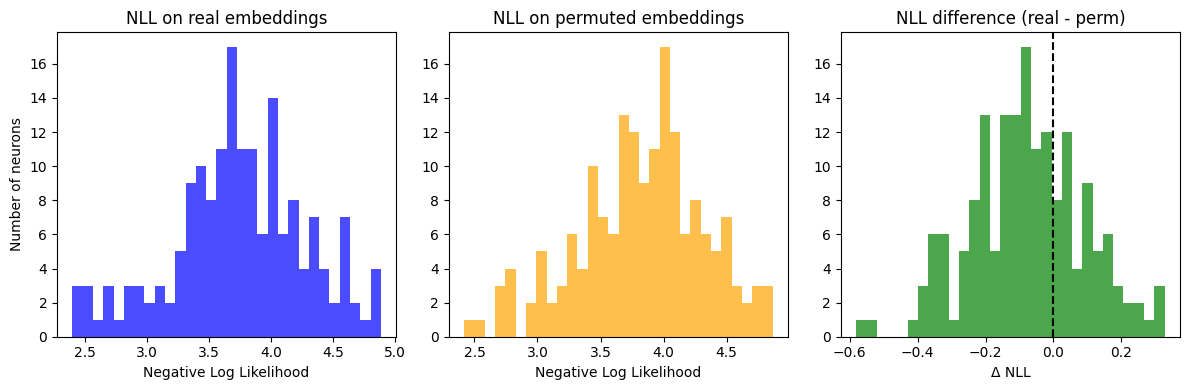

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load results
with open("/home/maria/MouseViT3/multi_task_nll_event_only.pkl", "rb") as f:
    nll_data = pickle.load(f)

nll_real = nll_data['real']
nll_perm = nll_data['perm']
nll_delta = nll_data['delta']

# Mask NaNs
valid_mask = ~np.isnan(nll_real) & ~np.isnan(nll_perm)
nll_real = nll_real[valid_mask]
nll_perm = nll_perm[valid_mask]
nll_delta = nll_delta[valid_mask]

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(nll_real, bins=30, alpha=0.7, label='Real', color='blue')
plt.title("NLL on real embeddings")
plt.xlabel("Negative Log Likelihood")
plt.ylabel("Number of neurons")

plt.subplot(1, 3, 2)
plt.hist(nll_perm, bins=30, alpha=0.7, label='Permuted', color='orange')
plt.title("NLL on permuted embeddings")
plt.xlabel("Negative Log Likelihood")

plt.subplot(1, 3, 3)
plt.hist(nll_delta, bins=30, alpha=0.7, label='Δ Real - Perm', color='green')
plt.axvline(0, color='black', linestyle='--')
plt.title("NLL difference (real - perm)")
plt.xlabel("Δ NLL")

plt.tight_layout()
plt.show()


(array([ 2.,  8., 43., 60., 31., 16.,  3.,  3.,  2.,  3.]),
 array([-9.91140720e-03, -6.63998193e-03, -3.36855666e-03, -9.71313827e-05,
         3.17429389e-03,  6.44571916e-03,  9.71714444e-03,  1.29885697e-02,
         1.62599950e-02,  1.95314203e-02,  2.28028455e-02]),
 <BarContainer object of 10 artists>)

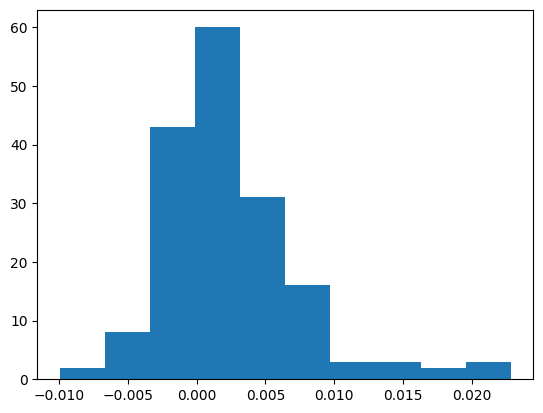

In [5]:
plt.hist(np.exp(-nll_real) - np.exp(-nll_perm))

In [9]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(nll_delta, alternative='less')


In [10]:
p_value

3.6011128548505494e-08